In [89]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
import diagnostic_plots
import datetime


import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import feature_selection as f_select
from sklearn import preprocessing
from copy import deepcopy
from fancyimpute import MICE as MICE

%matplotlib inline
%config InlineBackend.figure_format = 'svg';

In [71]:
with open('./data/processed/reduced_df2.pkl', 'rb') as picklefile:
    reduced_df2 = pickle.load(picklefile)

In [107]:
y = reduced_df2['price']
X = reduced_df2.drop(('price'), axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=666)

## Deal with the missing data first

In [73]:
def standardize_na(df, cols, navalues):
    for col in cols:
        for navalue in navalues:
            df.loc[df[col] == navalue, col] = np.nan
        df[col] = df[col].astype(float)
        #df.loc[df[col] == '123456789.0', col] = np.nan
    return df

In [74]:
col_to_clean = ['city', 'highway', 'engine', 'cylinder', 'horsepower', 'torque']
na_values = ['N/A', '0']

X_train = standardize_na(X_train, col_to_clean, na_values)

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [91]:
X_train_imputed = pd.DataFrame(data = MICE().complete(X_train), columns=X_train.columns, index=X_train.index);

[MICE] Completing matrix with shape (1614, 63)
[MICE] Starting imputation round 1/110, elapsed time 0.003
[MICE] Starting imputation round 2/110, elapsed time 0.013
[MICE] Starting imputation round 3/110, elapsed time 0.022
[MICE] Starting imputation round 4/110, elapsed time 0.031
[MICE] Starting imputation round 5/110, elapsed time 0.041
[MICE] Starting imputation round 6/110, elapsed time 0.050
[MICE] Starting imputation round 7/110, elapsed time 0.062
[MICE] Starting imputation round 8/110, elapsed time 0.074
[MICE] Starting imputation round 9/110, elapsed time 0.084
[MICE] Starting imputation round 10/110, elapsed time 0.098
[MICE] Starting imputation round 11/110, elapsed time 0.107
[MICE] Starting imputation round 12/110, elapsed time 0.116
[MICE] Starting imputation round 13/110, elapsed time 0.125
[MICE] Starting imputation round 14/110, elapsed time 0.134
[MICE] Starting imputation round 15/110, elapsed time 0.143
[MICE] Starting imputation round 16/110, elapsed time 0.153
[M

In [ ]:
X_test = standardize_na(X_test, col_to_clean, na_values)

In [111]:
X_test.shape

(539, 63)

In [113]:
df_test_numeric = X_test.as_matrix()
df_test_numeric.shape

(539, 63)

In [114]:
X_test_imputed = pd.DataFrame(data = MICE().complete(df_test_numeric), columns=X_test.columns, index=X_test.index);

[MICE] Completing matrix with shape (539, 63)
[MICE] Starting imputation round 1/110, elapsed time 0.002
[MICE] Starting imputation round 2/110, elapsed time 0.010
[MICE] Starting imputation round 3/110, elapsed time 0.017
[MICE] Starting imputation round 4/110, elapsed time 0.022
[MICE] Starting imputation round 5/110, elapsed time 0.027
[MICE] Starting imputation round 6/110, elapsed time 0.033
[MICE] Starting imputation round 7/110, elapsed time 0.038
[MICE] Starting imputation round 8/110, elapsed time 0.043
[MICE] Starting imputation round 9/110, elapsed time 0.049
[MICE] Starting imputation round 10/110, elapsed time 0.053
[MICE] Starting imputation round 11/110, elapsed time 0.058
[MICE] Starting imputation round 12/110, elapsed time 0.064
[MICE] Starting imputation round 13/110, elapsed time 0.069
[MICE] Starting imputation round 14/110, elapsed time 0.074
[MICE] Starting imputation round 15/110, elapsed time 0.079
[MICE] Starting imputation round 16/110, elapsed time 0.084
[MI

In [105]:
df_test_numeric.shape

(539, 51)

In [94]:
#df_train_numeric = df_train[['Age']].select_dtypes(include=[np.float]).as_matrix()
X_train_imputed = pd.DataFrame(data = MICE().complete(X_train), columns=X_train.columns, index=X_train.index);

pandas.core.frame.DataFrame

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 16057160 to 16198309
Data columns (total 63 columns):
images                        1614 non-null int64
age                           1614 non-null int64
city                          1502 non-null float64
highway                       1502 non-null float64
transmission                  1614 non-null int64
drive                         1614 non-null int64
engine                        1591 non-null float64
cylinder                      1591 non-null float64
horsepower                    1519 non-null float64
torque                        1512 non-null float64
rating_5                      1614 non-null int64
rating_4                      1614 non-null int64
rating_3                      1614 non-null int64
rating_2                      1614 non-null int64
rating_1                      1614 non-null int64
mileage                       1614 non-null float64
owner                         1614 non-null int64
event                  

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 16057160 to 16198309
Data columns (total 63 columns):
images                        1614 non-null int64
age                           1614 non-null int64
city                          1502 non-null object
highway                       1502 non-null object
transmission                  1614 non-null int64
drive                         1614 non-null int64
engine                        1591 non-null object
cylinder                      1591 non-null object
horsepower                    1519 non-null object
torque                        1512 non-null object
rating_5                      1614 non-null int64
rating_4                      1614 non-null int64
rating_3                      1614 non-null int64
rating_2                      1614 non-null int64
rating_1                      1614 non-null int64
mileage                       1614 non-null float64
owner                         1614 non-null int64
event                        

In [749]:
def imput_training_avg(df, col, navalues):
    
    non_na = df    
    df[col] = df[col].astype(str)
    
    for navalue in navalues:
        non_na = non_na.loc[non_na[col]!= navalue]
    
    cal_mean = np.mean(non_na[col].astype(float))
    
    for navalue in navalues:
        df.loc[df[col] == navalue, col] = cal_mean

    return df[col].astype(float), cal_mean

In [750]:
def impute_training_avg(df, training_mean_dict, navalues):
    for col in training_mean_dict.keys():
        for navalue in navalues:
            df.loc[df[col] == navalue, col] = training_mean_dict[col]
        
        df.loc[:,col] = df[col].astype(float)
    return df

In [751]:
col_to_clean = ['city', 'highway', 'engine', 'cylinder', 'horsepower', 'torque']

training_mean_dict = {}
for col in col_to_clean:
    X_train.loc[:,col], cal_mean = imput_training_avg(X_train, col, ['N/A', '0'])
    training_mean_dict[col] = cal_mean

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [752]:
X_test = impute_training_avg(X_test, training_mean_dict, ['N/A', '0'])

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [639]:
X_train_num = deepcopy(X_train)
X_test_num = deepcopy(X_test)

In [756]:
X_train_num.shape

(1614, 63)

## Basic EDA

In [753]:
df_num_train = pd.concat((y_train, X_train_num), axis=1)

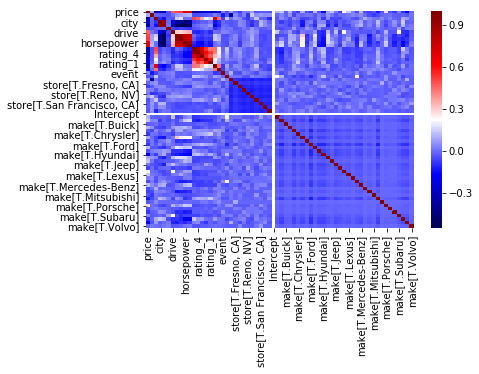

In [754]:
# Check correlations
sns.heatmap(df_num_train.corr(), cmap="seismic");

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


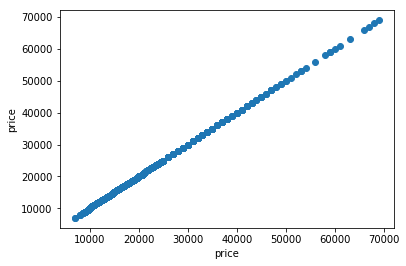

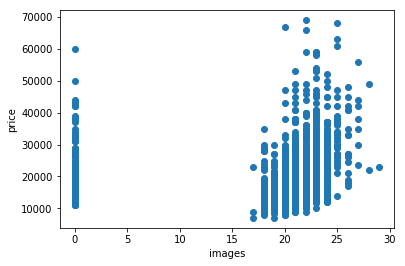

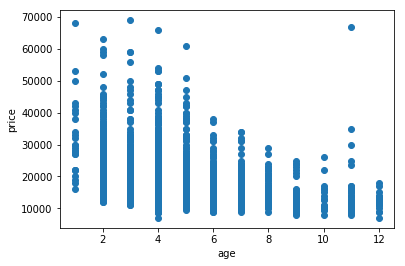

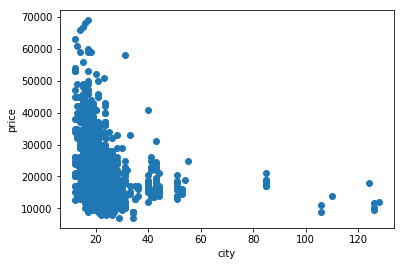

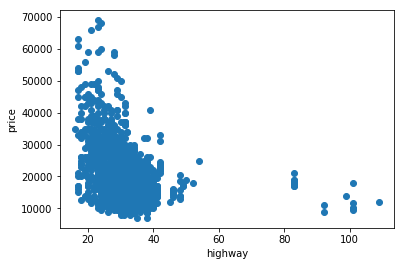

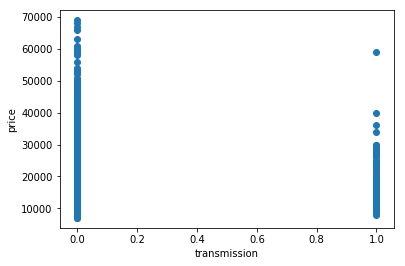

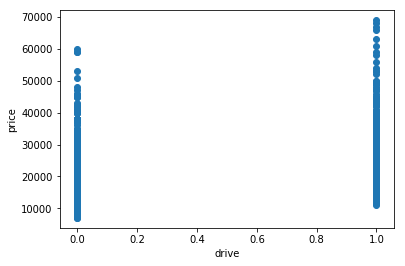

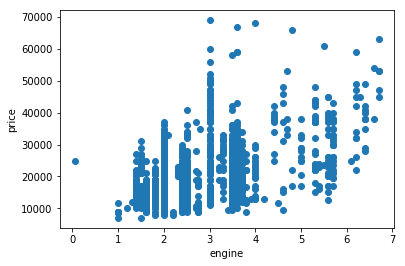

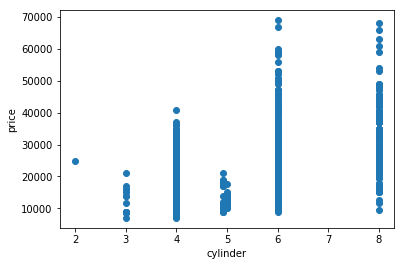

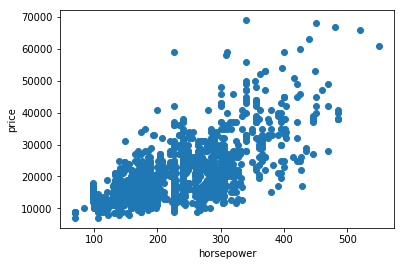

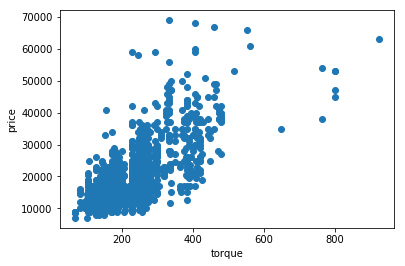

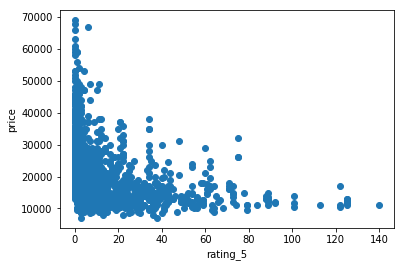

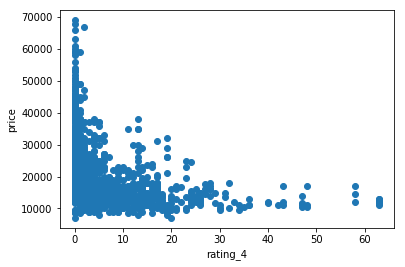

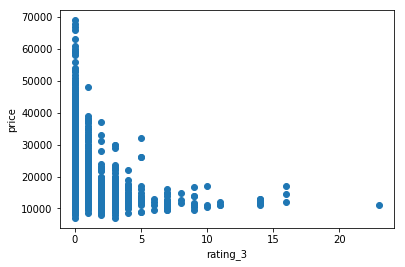

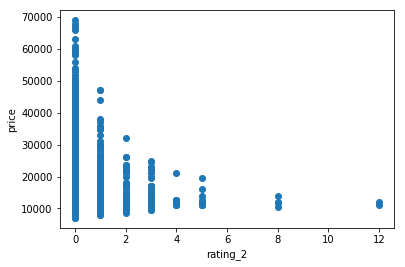

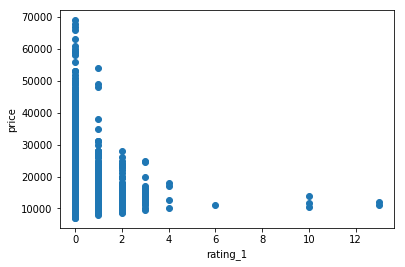

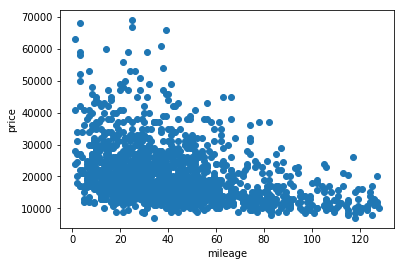

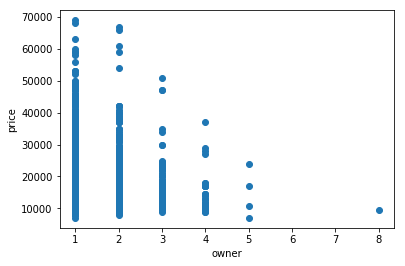

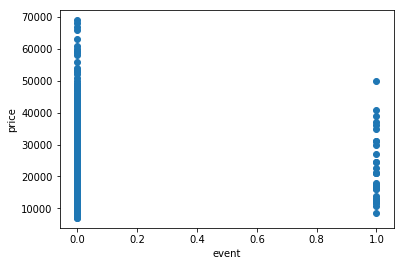

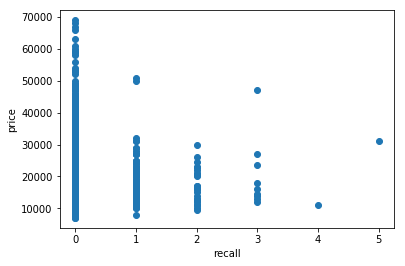

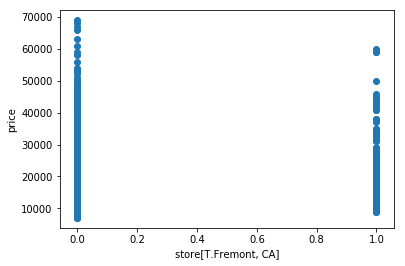

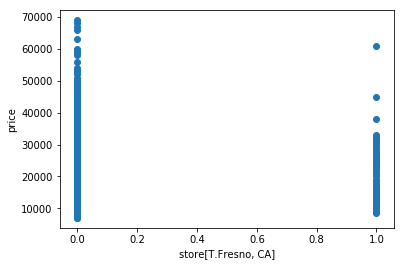

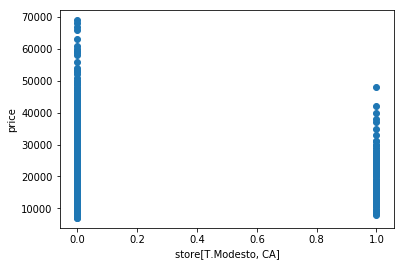

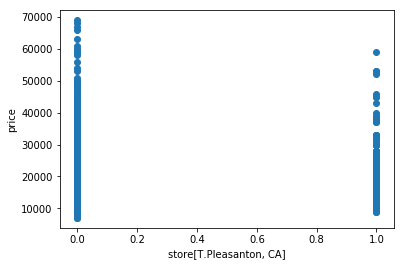

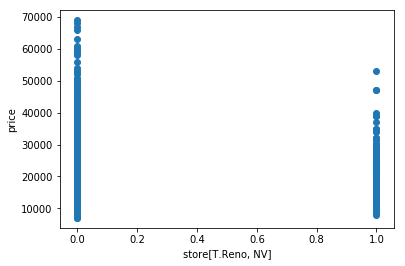

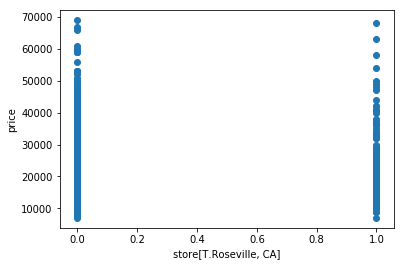

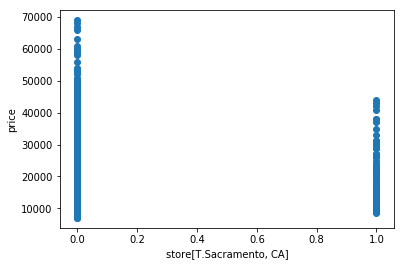

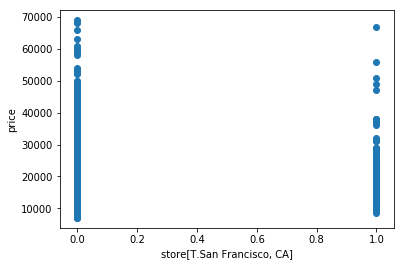

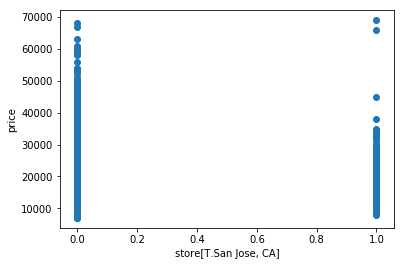

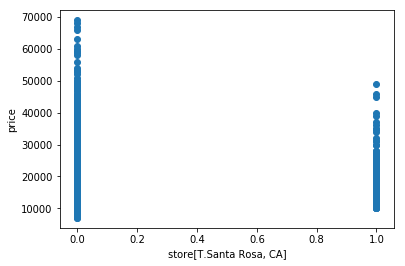

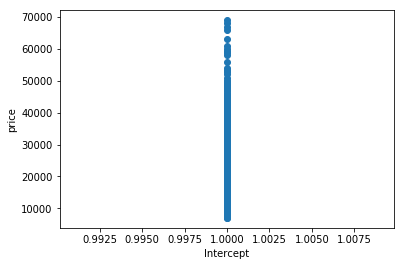

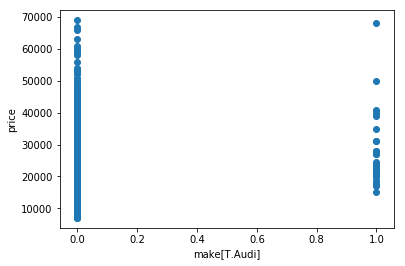

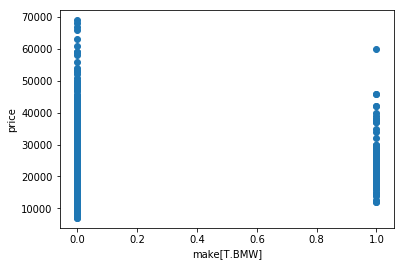

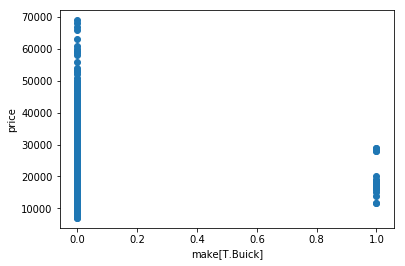

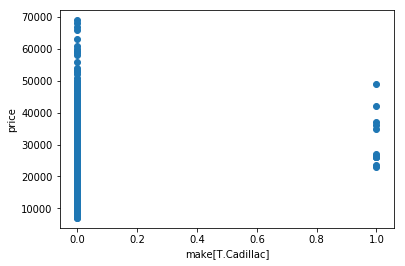

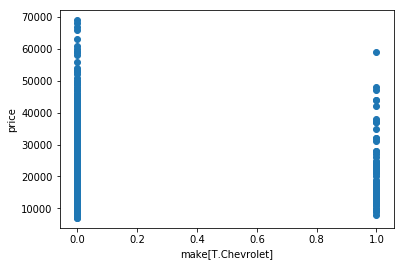

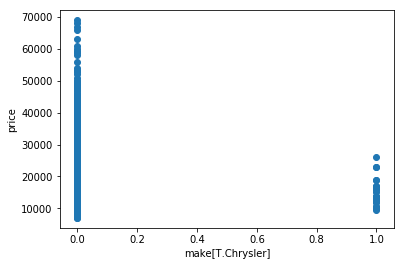

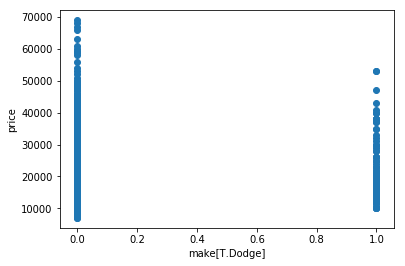

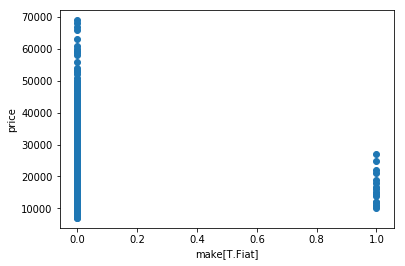

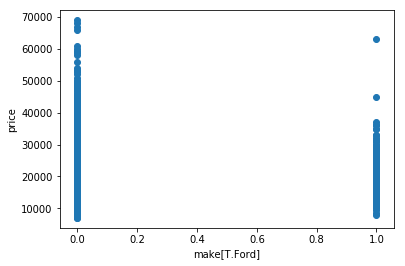

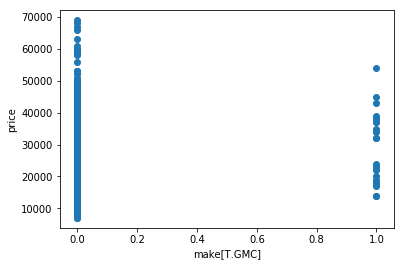

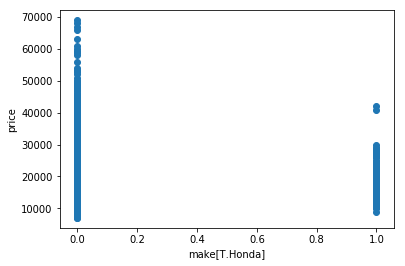

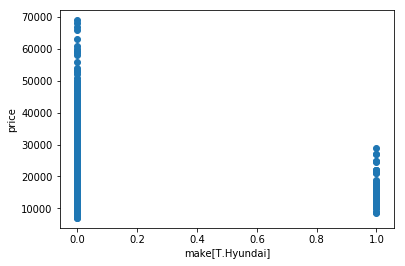

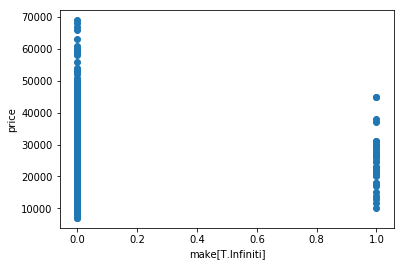

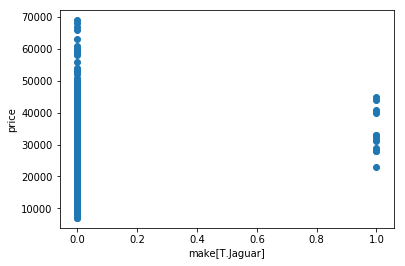

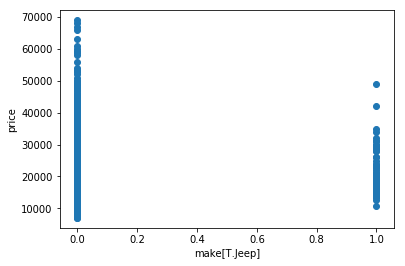

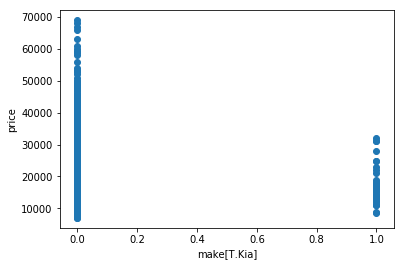

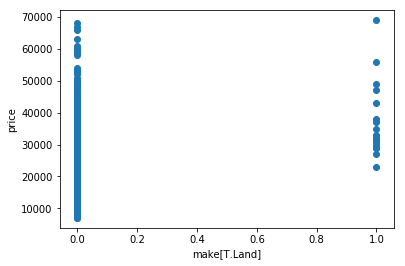

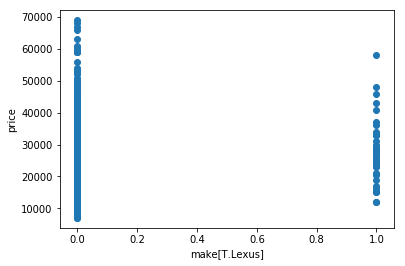

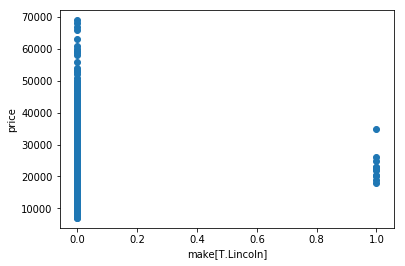

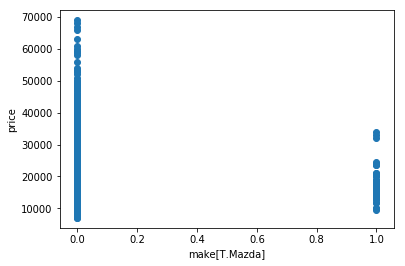

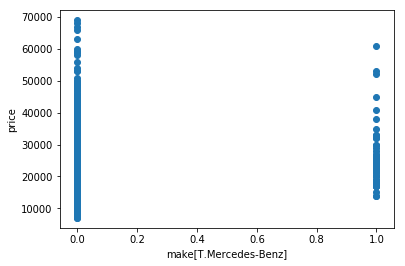

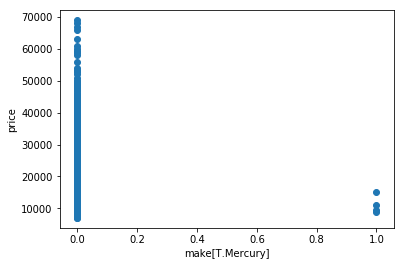

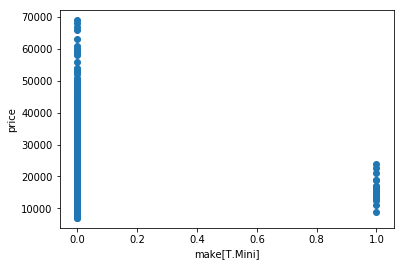

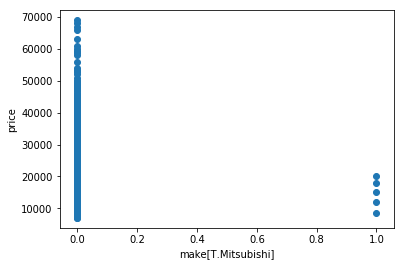

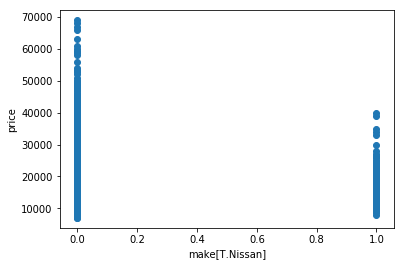

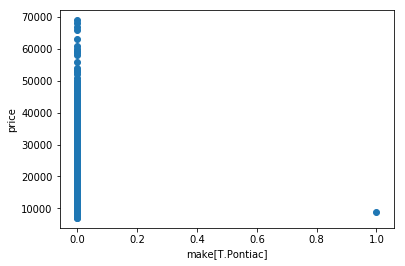

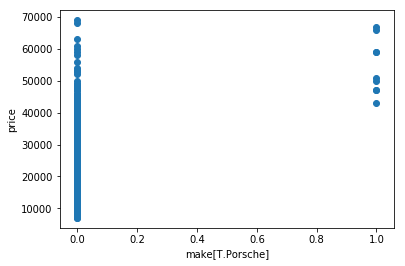

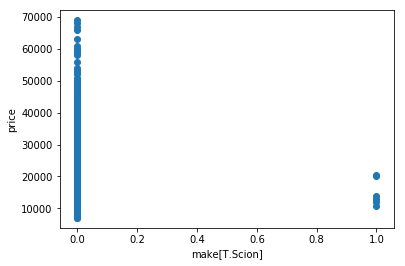

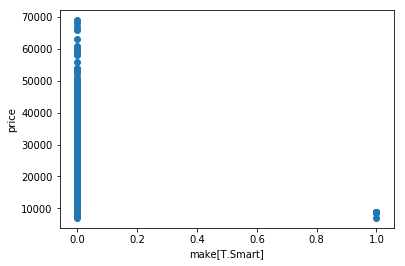

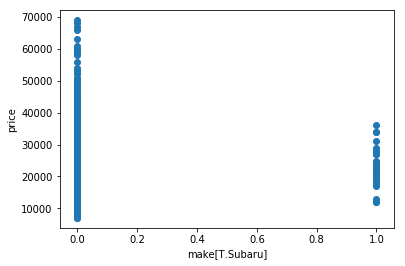

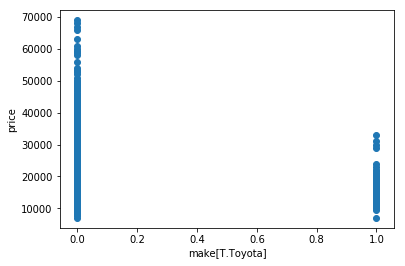

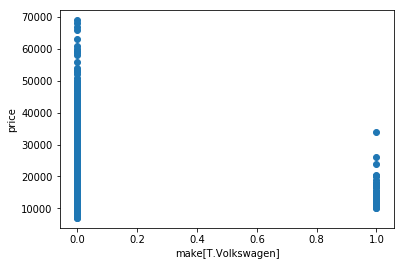

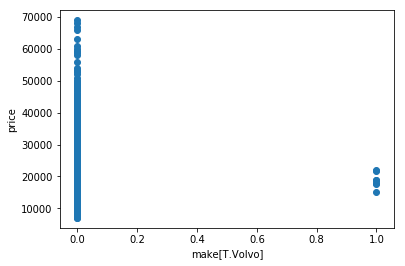

In [757]:
for col in df_num_train:
    plt.figure()
    ax = plt.scatter(x=df_num_train[col], y=y_train)
    plt.xlabel(col)
    plt.ylabel('price')

## Fit data into models

**Model_1 : Basic model with All variables**

In [781]:
model1 = LinearRegression(fit_intercept=False)
model1_scores = cross_val_score(model1, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
model1_score = np.sqrt(-np.mean(model1_scores))

print ("CV training rmse score: ", model1_score)

# print ("Training r-squared score: ", model1.score(X_train_num, y_train))
# print ("Test r-squared score: ", model1.score(X_test_num, y_test))
# print ("Training adj r-squared score: ", get_adj_r2(X_train_num, y_train))
# print ("Test adj r-squared score: ", get_adj_r2(X_test_num, y_test))

CV training rmse score:  3742.62978542


In [778]:
model1_sm = sm.OLS(y_train, X_train).fit()
model1_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     128.5
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:20:10   Log-Likelihood:                -15497.
No. Observations:                1614   AIC:                         3.112e+04
Df Residuals:                    1551   BIC:                         3.146e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
images                        50.0671     17.668      2.834      0.005      15.412      84.722
age                        -1099.4089     71.463    -15.384      0.000   -1239.583    -959.235
city                         260.1661     29.895      8.703      0.000     201.527     318.805
highway                     -387.8976     40.296     -9.626      0.000    -466.938    -308.857
transmission                 426.3925    444.676      0.959      0.338    -445.837    1298.622
drive                       2945.3266    294.197     10.011      0.000    2368.260    3522.393
engine                       350.6269    303.303      1.156      0.248    -244.300     945.554
cylinder                     574.4547    233.230      2.463      0.014     116.976    1031.933
horsepower                    12.4879      3.567      3.501      0.000       5.491      19.485
torque                        35.4548      2.613     13.569      0.000      30.330      40.580
rating_5                      -9.8062     12.811     -0.765      0.444     -34.935      15.323
rating_4                      50.2079     34.046      1.475      0.140     -16.574     116.989
rating_3                     111.6069     84.428      1.322      0.186     -53.998     277.212
rating_2                    -184.5676    131.386     -1.405      0.160    -442.281      73.146
rating_1                     106.3275    132.738      0.801      0.423    -154.037     366.693
mileage                      -75.0201      5.349    -14.025      0.000     -85.512     -64.528
owner                        114.9086    149.043      0.771      0.441    -177.439     407.256
event                        867.1139    634.793      1.366      0.172    -378.029    2112.257
recall                      -185.0715    243.842     -0.759      0.448    -663.367     293.224
store[T.Fremont, CA]        1757.0122    476.047      3.691      0.000     823.248    2690.776
store[T.Fresno, CA]          860.0202    513.958      1.673      0.094    -148.105    1868.145
store[T.Modesto, CA]        1020.3437    467.770      2.181      0.029     102.815    1937.873
store[T.Pleasanton, CA]      734.9050    449.918      1.633      0.103    -147.606    1617.416
store[T.Reno, NV]            262.5993    468.549      0.560      0.575    -656.458    1181.656
store[T.Roseville, CA]       946.3932    444.216      2.130      0.033      75.065    1817.721
store[T.Sacramento, CA]      917.3206    478.615      1.917      0.055     -21.480    1856.121
store[T.San Francisco, CA]   255.9410    457.269      0.560      0.576    -640.990    1152.872
store[T.San Jose, CA]        361.4076    471.697      0.766      0.444    -563.823    1286.638
store[T.Santa Rosa, CA]      184.8093    456.533      0.405      0.686    -710.678    1080.296
Intercept                    1.87e+04   141

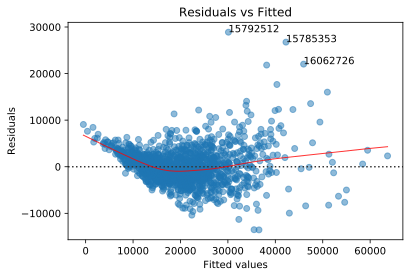

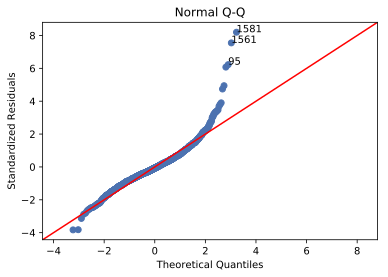

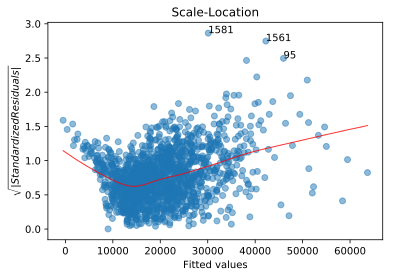

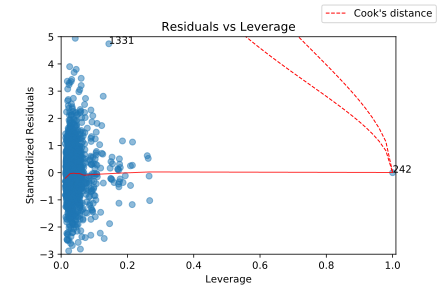

In [800]:
diagnostic_plots.diagnostic_plots(X_train, y_train, model1_sm)

In [774]:
est = LinearRegression(fit_intercept=False)
kf = KFold(n=len(X_train), n_folds=5, shuffle=True)

all_scores=[]

# Instead of using cross_val_score, let's use sklearn.cross_validation.KFold; this will allow
# us to 'manipulate' our training set, 

# get indices of corresponding train & test
for train_cv, test_cv in kf:
    x_train_cv = X_train.iloc[train_cv]
    y_train_cv = y_train.iloc[train_cv]
    x_test_cv = X_train.iloc[test_cv]
    y_test_cv = y_train.iloc[test_cv]
    pvals=[]
    sig_cols=[]

    '''
    for feature in x_train_cv.columns:
        pval = f_select.f_regression(x_train_cv[[feature]],y_train_cv)
        if pval[1][0]<.02: 
            sig_cols.append(feature)
            pvals.append(pval[1][0])
    '''
    
    est.fit(x_train_cv, y_train_cv)
    r_2=est.score(x_test_cv, y_test_cv)
    all_scores.append(r_2)

In [776]:
np.mean(all_scores)

0.81240869835481178

In [645]:
def get_adj_r2(X, y):
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)
    r2 = model.score(X, y)
    return 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

**Model_2: Transform y with log**

In [646]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
model2 = LinearRegression(fit_intercept=False)
model2.fit(X_train_num, y_train_log)
print ("Training r-squared score: ", model2.score(X_train_num, y_train_log))
print ("Test r-squared score: ", model2.score(X_test_num, y_test_log))
print ("Training adj r-squared score: ", get_adj_r2(X_train_num, y_train_log))
print ("Test adj r-squared score: ", get_adj_r2(X_test_num, y_test_log))

Training r-squared score:  0.872350475773
Test r-squared score:  0.867514217008
Training adj r-squared score:  0.867162140272
Test adj r-squared score:  0.875339085486


In [647]:
model2_sm = sm.OLS(y_train_log, X_train_num).fit()
model2_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     171.0
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:37:21   Log-Likelihood:                 900.91
No. Observations:                1614   AIC:                            -1676.
Df Residuals:                    1551   BIC:                            -1336.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
images                         0.0020      0.001      2.995      0.003       0.001       0.003
age                           -0.0526      0.003    -19.028      0.000      -0.058      -0.047
city                           0.0110      0.001      9.492      0.000       0.009       0.013
highway                       -0.0172      0.002    -11.063      0.000      -0.020      -0.014
transmission                  -0.0174      0.017     -1.014      0.311      -0.051       0.016
drive                          0.1326      0.011     11.649      0.000       0.110       0.155
engine                         0.0214      0.012      1.822      0.069      -0.002       0.044
cylinder                       0.0088      0.009      0.976      0.329      -0.009       0.027
horsepower                     0.0012      0.000      8.375      0.000       0.001       0.001
torque                         0.0010      0.000     10.219      0.000       0.001       0.001
rating_5                       0.0004      0.000      0.711      0.477      -0.001       0.001
rating_4                      -0.0001      0.001     -0.085      0.933      -0.003       0.002
rating_3                       0.0012      0.003      0.372      0.710      -0.005       0.008
rating_2                      -0.0095      0.005     -1.869      0.062      -0.019       0.000
rating_1                       0.0041      0.005      0.806      0.420      -0.006       0.014
mileage                       -0.0037      0.000    -17.916      0.000      -0.004      -0.003
owner                      -8.847e-05      0.006     -0.015      0.988      -0.011       0.011
event                          0.0315      0.025      1.284      0.199      -0.017       0.080
recall                         0.0038      0.009      0.405      0.686      -0.015       0.022
store[T.Fremont, CA]           0.0640      0.018      3.476      0.001       0.028       0.100
store[T.Fresno, CA]            0.0366      0.020      1.843      0.066      -0.002       0.076
store[T.Modesto, CA]           0.0335      0.018      1.850      0.064      -0.002       0.069
store[T.Pleasanton, CA]        0.0222      0.017      1.276      0.202      -0.012       0.056
store[T.Reno, NV]              0.0100      0.018      0.554      0.580      -0.026       0.046
store[T.Roseville, CA]         0.0314      0.017      1.825      0.068      -0.002       0.065
store[T.Sacramento, CA]        0.0329      0.019      1.778      0.076      -0.003       0.069
store[T.San Francisco, CA]    -0.0009      0.018     -0.050      0.960      -0.036       0.034
store[T.San Jose, CA]          0.0055      0.018      0.302      0.763      -0.030       0.041
store[T.Santa Rosa, CA]       -0.0024      0.018     -0.136      0.892      -0.037       0.032
Intercept                      9.9320      

Significant predictors are: <br>
    images, age, city, highway, drive, engine, horsepower, torque, mileage

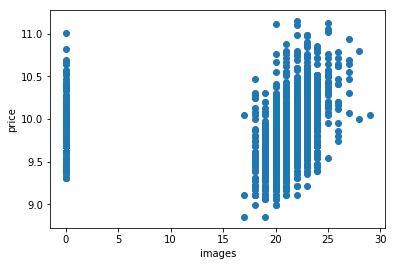

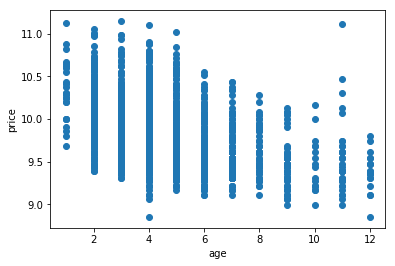

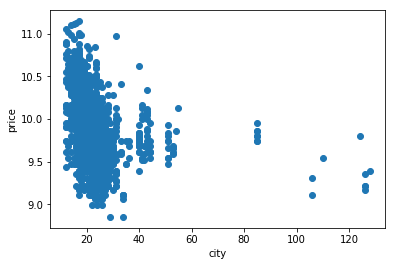

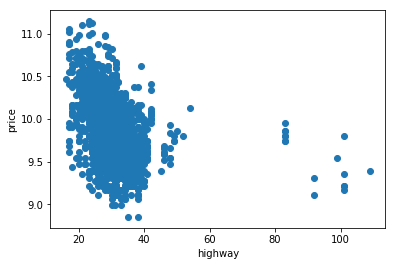

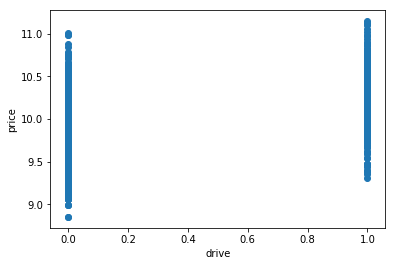

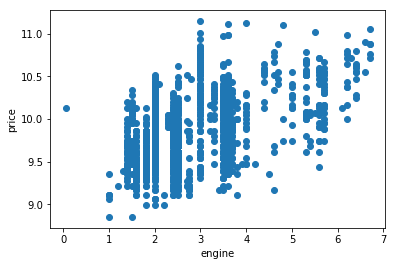

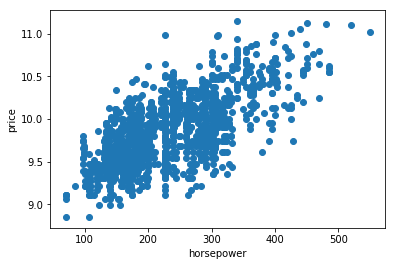

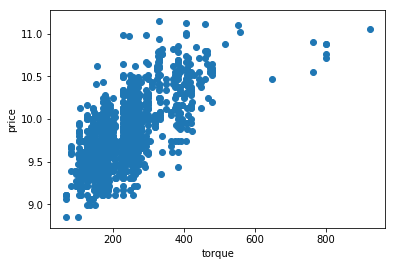

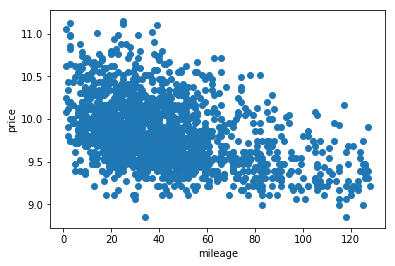

In [648]:
sig_cols = ['images', 'age', 'city', 'highway', 'drive', 'engine', 'horsepower', 'torque', 'mileage']
df_num_train_log = pd.concat((y_train_log, X_train_num), axis=1)
for col in sig_cols:
    plt.figure()
    ax = plt.scatter(x=df_num_train[col], y=y_train_log)
    plt.xlabel(col)
    plt.ylabel('price')

**Model_3: Introduce cross-validation**

In [649]:
reg = LinearRegression(fit_intercept=False)
model1_cv_mse = cross_val_score(reg, X_train_num, y_train, cv=5, scoring='neg_mean_squared_error')
print ("Model 1 MSE Error:", -np.mean(model1_cv_mse))
model2_cv_mse = cross_val_score(reg, X_train_num, y_train_log, cv=5, scoring='neg_mean_squared_error')
print ("Model 2 MSE Error:", -np.mean(model2_cv_mse))


Model 1 MSE Error: 14007277.7107
Model 2 MSE Error: 0.0211792574281


** Model_4: Introduce polynomial terms **

In [851]:
df_pvalue = pd.DataFrame(list(zip(model1_sm.params.index, model1_sm.pvalues)), columns=['variable', 'pvalue'])

In [904]:
df_pvalue[df_pvalue['pvalue']<0.001]

variable        pvalue
1                    age  8.187661e-50
2                   city  8.126906e-18
3                highway  2.416008e-21
5                  drive  6.619113e-23
8             horsepower  4.769109e-04
9                 torque  1.023107e-39
15               mileage  3.665644e-42
19  store[T.Fremont, CA]  2.312504e-04
29             Intercept  8.876878e-38
35      make[T.Chrysler]  9.066006e-08
36         make[T.Dodge]  3.963927e-08
38          make[T.Ford]  4.589154e-07
41       make[T.Hyundai]  4.907728e-04
43        make[T.Jaguar]  2.368792e-04
44          make[T.Jeep]  1.795373e-04
45           make[T.Kia]  7.550231e-04
46          make[T.Land]  4.987342e-13
47         make[T.Lexus]  4.120405e-06
54        make[T.Nissan]  5.882004e-07
56       make[T.Porsche]  1.495871e-38
61    make[T.Volkswagen]  1.635169e-08

In [949]:
significant_var = df_pvalue[df_pvalue['pvalue']<0.01].variable[0:8].tolist()

In [950]:
X_train_poly = X_train[significant_var]

In [951]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias = False)
poly.fit_transform(X_train_poly)

X_train_interact = pd.DataFrame(poly.fit_transform(X_train_poly), columns = poly.get_feature_names(significant_var), index = X_train_poly.index )

In [952]:
tmp = X_train.drop((significant_var), axis=1)

In [953]:
X_train_int = pd.concat([tmp, X_train_interact], axis=1, join_axes=[tmp.index])

In [954]:
model4 = LinearRegression(fit_intercept=False)
model4_scores = cross_val_score(model4,  X_train_int, y_train, cv=5, scoring='neg_mean_squared_error')
model4_score = np.sqrt(-np.mean(model4_scores))

print ("CV training rmse score: ", model4_score)

CV training rmse score:  3290.68691456


In [789]:
X_train_poly = deepcopy(X_train)
X_train_poly['torque_log'] = np.log(X_train_poly['torque'])
X_train_poly['horsepower_log'] = np.log(X_train_poly['horsepower'])
X_train_poly['image_quad'] = X_train_poly['images']**2
X_train_poly['image_cub'] = X_train_poly['images']**3
X_train_poly['age_quad'] = X_train_poly['age']**2
X_train_poly['age_cub'] = X_train_poly['age']**3

In [790]:
X_test_poly = deepcopy(X_test)
X_test_poly['torque_log'] = np.log(X_test_poly['torque'])
X_test_poly['horsepower_log'] = np.log(X_test_poly['horsepower'])
X_test_poly['image_quad'] = X_test_poly['images']**2
X_test_poly['image_cub'] = X_test_poly['images']**3
X_test_poly['age_quad'] = X_test_poly['age']**2
X_test_poly['age_cub'] = X_test_poly['age']**3

In [794]:
model4 = LinearRegression(fit_intercept=False)
model4_scores = cross_val_score(model4,  X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
model4_score = np.sqrt(-np.mean(model4_scores))

print ("CV training rmse score: ", model4_score)

CV training rmse score:  3535.30346253


In [795]:
# Create your model
model4_sm = sm.OLS(y_train, X_train_poly).fit()

# Print summary statistics of the model's performance
model4_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     135.9
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:33:05   Log-Likelihood:                -15393.
No. Observations:                1614   AIC:                         3.092e+04
Df Residuals:                    1545   BIC:                         3.130e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
images                       241.1137    450.916      0.535      0.593    -643.358    1125.585
age                        -2823.3727    471.587     -5.987      0.000   -3748.390   -1898.355
city                         200.2063     28.603      6.999      0.000     144.101     256.312
highway                     -304.5949     38.810     -7.848      0.000    -380.720    -228.469
transmission                 165.8039    423.388      0.392      0.695    -664.672     996.279
drive                       2921.5874    278.045     10.508      0.000    2376.202    3466.973
engine                       477.6786    290.240      1.646      0.100     -91.628    1046.985
cylinder                     126.6983    228.730      0.554      0.580    -321.956     575.353
horsepower                    44.2510      8.940      4.950      0.000      26.716      61.786
torque                        46.3299      5.223      8.871      0.000      36.086      56.574
rating_5                       1.8929     12.081      0.157      0.876     -21.803      25.589
rating_4                      42.7633     32.189      1.329      0.184     -20.375     105.901
rating_3                      74.9153     79.513      0.942      0.346     -81.049     230.879
rating_2                    -162.4411    123.996     -1.310      0.190    -405.659      80.777
rating_1                     101.9979    125.017      0.816      0.415    -143.223     347.219
mileage                      -74.0916      5.043    -14.691      0.000     -83.984     -64.199
owner                        217.1659    142.213      1.527      0.127     -61.785     496.117
event                        370.7862    598.913      0.619      0.536    -803.982    1545.554
recall                      -158.2392    229.757     -0.689      0.491    -608.909     292.430
store[T.Fremont, CA]        1267.4972    449.219      2.822      0.005     386.354    2148.641
store[T.Fresno, CA]         1332.9772    487.499      2.734      0.006     376.748    2289.207
store[T.Modesto, CA]         601.9953    440.782      1.366      0.172    -262.598    1466.589
store[T.Pleasanton, CA]      766.7423    423.242      1.812      0.070     -63.447    1596.932
store[T.Reno, NV]             14.1785    441.285      0.032      0.974    -851.402     879.759
store[T.Roseville, CA]       328.1759    421.581      0.778      0.436    -498.755    1155.106
store[T.Sacramento, CA]      994.0580    452.349      2.198      0.028     106.776    1881.340
store[T.San Francisco, CA]   298.9477    430.171      0.695      0.487    -544.833    1142.728
store[T.San Jose, CA]        276.8536    443.661      0.624      0.533    -593.388    1147.096
store[T.Santa Rosa, CA]      393.6407    430.145      0.915      0.360    -450.089    1237.370
Intercept                   6.917e+04   694

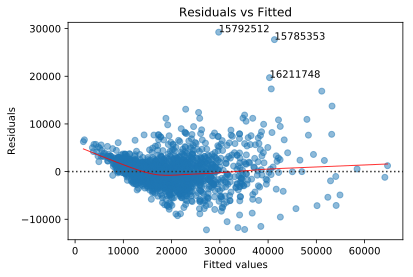

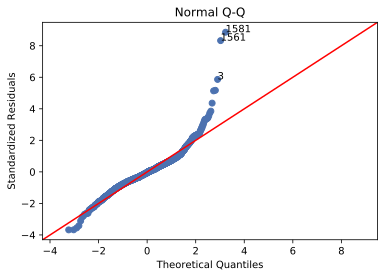

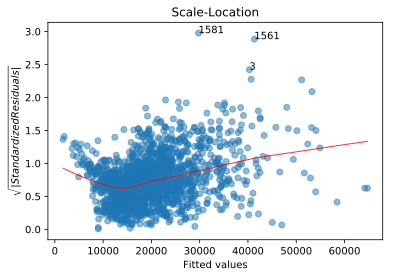

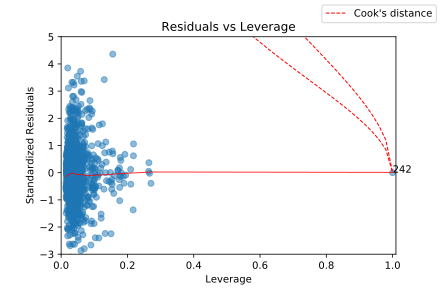

In [797]:
diagnostic_plots.diagnostic_plots(X_train_poly, y_train, model4_sm)

Model_5: Different transformations

In [803]:
X_train_poly2 = deepcopy(X_train_poly)
X_train_poly2['torque_quad'] = X_train_poly2['torque']**2
X_train_poly2['torque_cub'] = X_train_poly2['torque']**3
X_train_poly2['horsepower_log'] = np.log(X_train_poly2['horsepower'])
X_train_poly2['mileage_quad'] = X_train_poly2['mileage']**2
X_train_poly2['mileage_cub'] = X_train_poly2['mileage']**3

In [805]:
model5 = LinearRegression(fit_intercept=False)
model5_scores = cross_val_score(model5,  X_train_poly2, y_train, cv=5, scoring='neg_mean_squared_error')
model5_score = np.sqrt(-np.mean(model5_scores))

print ("CV training rmse score: ", model5_score)

CV training rmse score:  3503.33866334


In [806]:
# Create your model
model5_sm = sm.OLS(y_train, X_train_poly2).fit()

# Print summary statistics of the model's performance
model5_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     132.9
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:39:40   Log-Likelihood:                -15368.
No. Observations:                1614   AIC:                         3.088e+04
Df Residuals:                    1541   BIC:                         3.127e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
images                       216.7576    445.739      0.486      0.627    -657.562    1091.077
age                        -1608.7639    505.501     -3.183      0.001   -2600.306    -617.221
city                         211.8586     28.296      7.487      0.000     156.356     267.362
highway                     -319.6782     38.404     -8.324      0.000    -395.008    -244.349
transmission                 -73.9507    420.913     -0.176      0.861    -899.574     751.673
drive                       2858.3265    274.733     10.404      0.000    2319.436    3397.217
engine                       125.1352    299.158      0.418      0.676    -461.665     711.935
cylinder                     414.0942    237.844      1.741      0.082     -52.437     880.626
horsepower                    44.8370     11.118      4.033      0.000      23.029      66.645
torque                      -202.3540     63.685     -3.177      0.002    -327.273     -77.435
rating_5                       2.7627     11.950      0.231      0.817     -20.678      26.203
rating_4                      33.8448     31.855      1.062      0.288     -28.640      96.330
rating_3                      68.5151     78.504      0.873      0.383     -85.470     222.500
rating_2                    -167.6106    122.385     -1.370      0.171    -407.669      72.448
rating_1                      70.5153    123.372      0.572      0.568    -171.480     312.510
mileage                     -249.6526     30.629     -8.151      0.000    -309.731    -189.574
owner                        155.3530    141.147      1.101      0.271    -121.507     432.213
event                         27.5673    592.996      0.046      0.963   -1135.597    1190.731
recall                      -218.0948    227.139     -0.960      0.337    -663.629     227.439
store[T.Fremont, CA]        1239.3917    442.782      2.799      0.005     370.872    2107.911
store[T.Fresno, CA]         1285.2455    480.627      2.674      0.008     342.493    2227.998
store[T.Modesto, CA]         493.0378    434.667      1.134      0.257    -359.564    1345.639
store[T.Pleasanton, CA]      649.2201    417.598      1.555      0.120    -169.901    1468.341
store[T.Reno, NV]             30.1838    434.983      0.069      0.945    -823.037     883.404
store[T.Roseville, CA]       222.5752    416.120      0.535      0.593    -593.646    1038.797
store[T.Sacramento, CA]      851.4572    446.451      1.907      0.057     -24.258    1727.172
store[T.San Francisco, CA]   210.7557    424.814      0.496      0.620    -622.519    1044.031
store[T.San Jose, CA]        266.3677    437.703      0.609      0.543    -592.189    1124.924
store[T.Santa Rosa, CA]      442.7357    424.549      1.043      0.297    -390.020    1275.491
Intercept                  -1.743e+04   2.3

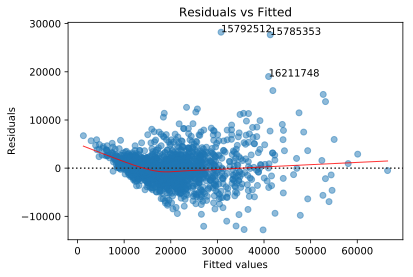

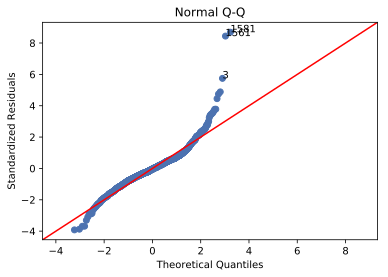

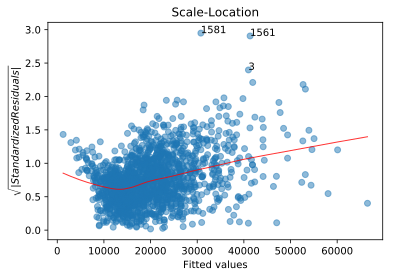

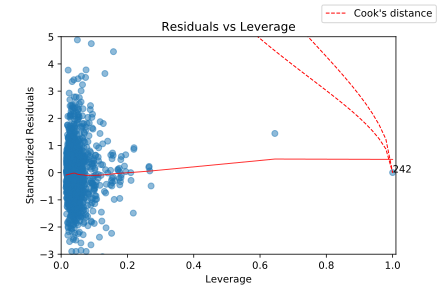

In [807]:
diagnostic_plots.diagnostic_plots(X_train_poly2, y_train, model5_sm)

In [657]:
X_test_poly2 = deepcopy(X_test_num)
X_test_poly2['torque_quad'] = X_test_poly2['torque']**2
X_test_poly2['torque_cub'] = X_test_poly2['torque']**3
X_test_poly2['horsepower_log'] = np.log(X_test_poly2['horsepower'])
X_test_poly2['mileage_quad'] = X_test_poly2['mileage']**2
X_test_poly2['mileage_cub'] = X_test_poly2['mileage']**3

In [658]:
model5 = LinearRegression(fit_intercept=False)
model5.fit(X_train_poly2, y_train_log)
print ("Training r-squared score: ", model5.score(X_train_poly2, y_train_log))
print ("Test r-squared score: ", model5.score(X_test_poly2, y_test_log))
print ("Training adj r-squared score: ", get_adj_r2(X_train_poly2, y_train_log))
print ("Test adj r-squared score: ", get_adj_r2(X_test_poly2, y_test_log))

Training r-squared score:  0.876597245881
Test r-squared score:  0.87233078565
Training adj r-squared score:  0.871165927253
Test adj r-squared score:  0.88089814856


** Model_6: Incorporate Lasso regularization **

In [659]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [660]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_poly_norm = min_max_scaler.fit_transform(X_train_poly)

In [661]:
model6_lasso =  Lasso(alpha = 0.00001)
model6_lasso.fit(X_train_poly_norm, y_train_log)
model6_lasso.score(X_train_poly_norm, y_train_log)

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.88723280431275586

In [662]:
alphas = [10**x for x in range(-12, 5)]
lscore = np.zeros((len(alphas), 1))
lcv_list = []
for i in range(len(alphas)):
    lcv = LassoCV(alphas=[alphas[i]], cv=5, normalize=False)
    lcv.fit(X_train_poly_norm, y_train_log)
    lcv_list.append(lcv)
    lscore[i] = lcv.score(X_train_poly_norm, y_train_log)

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coo

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coo

In [663]:
print ("Best lambda is {}".format(alphas[lscore.argmax()]))
print ("Best r2 score is {}".format(lscore.max()))

Best lambda is 1e-12
Best r2 score is 0.8873148555339946


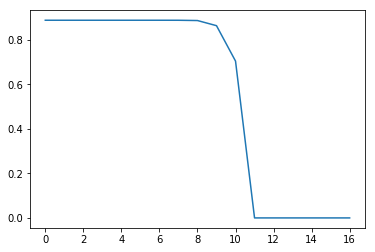

In [664]:
plt.plot(range(len(lscore)), lscore)

In [665]:
X_test_poly_norm = min_max_scaler.transform(X_test_poly)

In [666]:
alpha = 1e-12
model6_lasso =  Lasso(alpha = alpha)
model6_lasso.fit(X_test_poly_norm, y_test_log)
model6_lasso.score(X_test_poly_norm, y_test_log)

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.90519117544536043

** Model_7: Add label for luxury cars **

In [955]:
def add_luxury(df):
    luxury_cars = (['Lincoln', 'Dodge', 'BMW', 'Infiniti', 'Mercedes-Benz', 'Lexus', 'Audi' ,'GMC', 'Cadillac', 'Jaguar', 
               'Land', 'Porsche'])
    luxury = np.zeros((df.shape[0], 1))
    for col in df.columns:
        make = col.replace("make[T.","").replace("]","")
        if make in luxury_cars:
            luxury = luxury + (np.array(df[col])).reshape(-1,1)
    cadillac = np.zeros((df.shape[0], 1))
    for col in df.columns:
        if ('make' in col):
            cadillac = cadillac + (np.array(df[col])).reshape(-1,1)
    cadillac = 1- cadillac
    df['luxury'] = luxury + cadillac
    return df

In [983]:
X_train_luxury = add_luxury(X_train_int)
#X_test_luxury = add_luxury(X_test_int)

In [957]:
X_train_luxury['mileage_morethan_100k'] = X_train_luxury['mileage'].apply(lambda x:1 if x > 100 else 0)
X_test_luxury['mileage_morethan_100k'] = X_test_luxury['mileage'].apply(lambda x:1 if x > 100 else 0)

In [958]:
def add_budget(df):
    budget_cars = (['Smart', 'Pontiac', 'Mercury'])
    budget = np.zeros((df.shape[0], 1))
    for col in df.columns:
        make = col.replace("make[T.","").replace("]","")
        if make in budget_cars:
            budget = budget + (np.array(df[col])).reshape(-1,1)
    df['budget'] = budget
    return df

In [959]:
X_train_budget = add_budget(X_train_luxury)
X_test_budget = add_budget(X_test_luxury)

In [960]:
model7 = LinearRegression(fit_intercept=False)
model7_scores = cross_val_score(model7,  X_train_budget, y_train, cv=5, scoring='neg_mean_squared_error')
model7_score = np.sqrt(-np.mean(model7_scores))

print ("CV training rmse score: ", model7_score)

CV training rmse score:  3289.23619799


In [814]:
model7_sm = sm.OLS(y_train, X_train_budget).fit()
model7_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     131.0
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:42:44   Log-Likelihood:                -15367.
No. Observations:                1614   AIC:                         3.088e+04
Df Residuals:                    1540   BIC:                         3.128e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
images                       219.4202    445.772      0.492      0.623    -654.964    1093.805
age                        -1594.4030    505.771     -3.152      0.002   -2586.475    -602.331
city                         212.4226     28.304      7.505      0.000     156.903     267.942
highway                     -320.5879     38.419     -8.345      0.000    -395.947    -245.229
transmission                 -81.5938    421.018     -0.194      0.846    -907.423     744.235
drive                       2863.1851    274.799     10.419      0.000    2324.166    3402.204
engine                       126.6163    299.178      0.423      0.672    -460.223     713.456
cylinder                     411.9512    237.868      1.732      0.084     -54.627     878.530
horsepower                    45.0072     11.120      4.047      0.000      23.195      66.819
torque                      -202.8058     63.690     -3.184      0.001    -327.735     -77.877
rating_5                       2.7141     11.951      0.227      0.820     -20.728      26.156
rating_4                      35.2218     31.893      1.104      0.270     -27.336      97.779
rating_3                      65.9291     78.558      0.839      0.401     -88.164     220.022
rating_2                    -162.5253    122.517     -1.327      0.185    -402.843      77.793
rating_1                      62.2727    123.706      0.503      0.615    -180.378     304.923
mileage                     -256.9892     31.660     -8.117      0.000    -319.091    -194.887
owner                        142.9430    141.803      1.008      0.314    -135.205     421.091
event                         22.3193    593.055      0.038      0.970   -1140.960    1185.599
recall                      -215.0406    227.175     -0.947      0.344    -660.646     230.565
store[T.Fremont, CA]        1261.8358    443.483      2.845      0.004     391.941    2131.730
store[T.Fresno, CA]         1287.5406    480.659      2.679      0.007     344.726    2230.355
store[T.Modesto, CA]         523.6049    435.969      1.201      0.230    -331.551    1378.761
store[T.Pleasanton, CA]      664.4040    417.949      1.590      0.112    -155.406    1484.214
store[T.Reno, NV]             42.4081    435.210      0.097      0.922    -811.259     896.075
store[T.Roseville, CA]       247.4063    417.024      0.593      0.553    -570.589    1065.402
store[T.Sacramento, CA]      854.4201    446.486      1.914      0.056     -21.364    1730.204
store[T.San Francisco, CA]   227.4212    425.226      0.535      0.593    -606.662    1061.504
store[T.San Jose, CA]        277.9605    437.909      0.635      0.526    -581.000    1136.921
store[T.Santa Rosa, CA]      461.0969    425.044      1.085      0.278    -372.630    1294.824
Intercept                  -1.826e+04   2.2

In [671]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_luxury_norm = min_max_scaler.fit_transform(X_train_luxury)
model7_lasso =  LassoCV(alphas = [1e-12], cv=5)
model7_lasso.fit(X_train_luxury_norm, y_train_log)
model7_lasso.score(X_train_luxury_norm, y_train_log)

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coo

0.88732650502036159

In [472]:
model7_sm = sm.OLS(y_train_log, X_train_luxury).fit()

# Print summary statistics of the model's performance
model7_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     176.4
Date:                Mon, 16 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:17:57   Log-Likelihood:                 1002.5
No. Observations:                1614   AIC:                            -1865.
Df Residuals:                    1544   BIC:                            -1488.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
images                        -0.0535      0.017     -3.060      0.002      -0.088      -0.019
age                           -0.0689      0.018     -3.756      0.000      -0.105      -0.033
city                           0.0096      0.001      8.645      0.000       0.007       0.012
highway                       -0.0149      0.002     -9.869      0.000      -0.018      -0.012
transmission                   0.0041      0.016      0.248      0.804      -0.028       0.036
drive                          0.1211      0.011     11.237      0.000       0.100       0.142
engine                         0.0159      0.011      1.417      0.157      -0.006       0.038
cylinder                       0.0124      0.009      1.401      0.161      -0.005       0.030
horsepower                     0.0001      0.000      0.370      0.711      -0.001       0.001
torque                         0.0011      0.000      5.363      0.000       0.001       0.001
rating_5                       0.0004      0.000      0.936      0.350      -0.000       0.001
rating_4                      -0.0002      0.001     -0.180      0.857      -0.003       0.002
rating_3                       0.0007      0.003      0.232      0.816      -0.005       0.007
rating_2                      -0.0093      0.005     -1.941      0.052      -0.019    9.91e-05
rating_1                       0.0046      0.005      0.948      0.343      -0.005       0.014
mileage                       -0.0037      0.000    -16.788      0.000      -0.004      -0.003
owner                          0.0060      0.006      1.088      0.277      -0.005       0.017
event                          0.0121      0.023      0.523      0.601      -0.033       0.058
recall                        -0.0010      0.009     -0.112      0.911      -0.018       0.016
store[T.Fremont, CA]           0.0439      0.017      2.521      0.012       0.010       0.078
store[T.Fresno, CA]            0.0630      0.019      3.332      0.001       0.026       0.100
store[T.Modesto, CA]           0.0205      0.017      1.197      0.232      -0.013       0.054
store[T.Pleasanton, CA]        0.0230      0.016      1.400      0.162      -0.009       0.055
store[T.Reno, NV]              0.0021      0.017      0.123      0.902      -0.031       0.036
store[T.Roseville, CA]        -0.0004      0.016     -0.027      0.979      -0.033       0.032
store[T.Sacramento, CA]        0.0481      0.018      2.744      0.006       0.014       0.083
store[T.San Francisco, CA]     0.0055      0.017      0.327      0.744      -0.027       0.038
store[T.San Jose, CA]          0.0048      0.017      0.277      0.782      -0.029       0.039
store[T.Santa Rosa, CA]        0.0107      0.017      0.645      0.519      -0.022       0.043
Intercept                      8.6192      

In [486]:
alphas = [10**x for x in range(-12, 5)]
lscore = np.zeros((len(alphas), 1))
lcv_list = []
for i in range(len(alphas)):
    lcv = LassoCV(alphas=[alphas[i]], cv=5, normalize=False)
    lcv.fit(X_train_luxury_norm, y_train_log)
    lcv_list.append(lcv)
    mse=np.mean((y_train_log-lcv.predict(X_train_luxury_norm))**2)
    lscore[i] = mse

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coo

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coo

In [490]:
print ("Best lambda is {}".format(alphas[lscore.argmin()]))
print ("Best r2 score is {}".format(lscore.min()))

Best lambda is 1e-12
Best r2 score is 0.016923623444750534


/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/statsmodels/stats/outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/songlin/Metis/metiswork/project/project2_luther/diagnostic_plots.py:131: RuntimeWarning: invalid value encountered in sqrt
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
/Users/

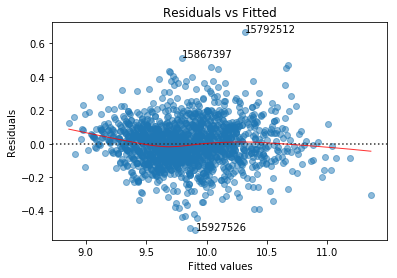

ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

In [473]:
diagnostic_plots.diagnostic_plots(X_train_luxury, y_train_log, model7_sm)

In [475]:
X_train_luxury.describe()

images          age         city      highway  transmission  \
count  1614.000000  1614.000000  1614.000000  1614.000000   1614.000000   
mean     19.693928     4.643742    23.676431    31.466045      0.048327   
std       5.884547     2.205802    10.384211     8.489948      0.214523   
min       0.000000     1.000000    12.000000    16.000000      0.000000   
25%      20.000000     3.000000    19.000000    27.000000      0.000000   
50%      21.000000     4.000000    23.000000    31.466045      0.000000   
75%      22.000000     6.000000    25.000000    35.000000      0.000000   
max      29.000000    12.000000   128.000000   109.000000      1.000000   

             drive       engine     cylinder   horsepower       torque  \
count  1614.000000  1614.000000  1614.000000  1614.000000  1614.000000   
mean      0.197646     2.748498     4.923947   227.042133   228.353175   
std       0.398347     1.095447     1.295660    77.806631    89.795191   
min       0.000000     0.060000     2.000000    70.000000    68.000000   
25%       0.000000     2.000000     4.000000   172.000000   172.000000   
50%       0.000000     2.400000     4.000000   208.000000   228.353175   
75%       0.000000     3.500000     6.000000   285.000000   264.000000   
max       1.000000     6.700000     8.000000   550.000000   925.000000   

               ...            make[T.Volkswagen]  make[T.Volvo]   torque_log  \
count          ...                   1614.000000    1614.000000  1614.000000   
mean           ...                      0.052664       0.004337     5.363556   
std            ...                      0.223431       0.065734     0.363333   
min            ...                      0.000000       0.000000     4.219508   
25%            ...                      0.000000       0.000000     5.147494   
50%            ...                      0.000000       0.000000     5.430893   
75%            ...                      0.000000       0.000000     5.575949   
max            ...                      1.000000       1.000000     6.829794   

       horsepower_log   image_quad     image_cub     age_quad      age_cub  \
count     1614.000000  1614.000000   1614.000000  1614.000000  1614.000000   
mean         5.367607   422.457249   9125.846344    26.426890   180.420694   
std          0.341342   141.730761   3575.880628    27.070788   298.641445   
min          4.248495     0.000000      0.000000     1.000000     1.000000   
25%          5.147494   400.000000   8000.000000     9.000000    27.000000   
50%          5.337538   441.000000   9261.000000    16.000000    64.000000   
75%          5.652489   484.000000  10648.000000    36.000000   216.000000   
max          6.309918   841.000000  24389.000000   144.000000  1728.000000   

            luxury  mileage_morethan_100k  
count  1614.000000            1614.000000  
mean      0.299876               0.043371  
std       0.458345               0.203753  
min       0.000000               0.000000  
25%       0.000000               0.000000  
50%       0.000000               0.000000  
75%       1.000000               0.000000  
max       1.000000               1.000000  

[8 rows x 71 columns]

In [466]:
idx = 242
model7_sm.predict(X_train_luxury)[idx-1], y_train_log[idx-1]

(9.5209652609380999, 9.5177515396089589)

In [467]:
X_train_luxury.iloc[i,:]

images                           20.000000
age                               5.000000
city                             23.676431
highway                          31.466045
transmission                      0.000000
drive                             0.000000
engine                            2.400000
cylinder                          4.000000
horsepower                      182.000000
torque                          172.000000
rating_5                         30.000000
rating_4                         18.000000
rating_3                          3.000000
rating_2                          2.000000
rating_1                          1.000000
mileage                          66.000000
owner                             3.000000
event                             0.000000
recall                            0.000000
store[T.Fremont, CA]              0.000000
store[T.Fresno, CA]               0.000000
store[T.Modesto, CA]              1.000000
store[T.Pleasanton, CA]           0.000000
store[T.Ren

In [420]:
print ("predicted:", np.exp(model7_sm.predict(X_train_luxury)[idx-1]))

predicted: 15478.8308071


In [421]:
print ("actual:", np.exp(y_train_log[idx-1]), y_train[idx-1])

actual: 13599.0 13599.0


In [418]:
X_train_luxury.head()

images  age       city    highway  transmission  drive  engine  \
stock_id                                                                   
16057160      20    5  24.000000  34.000000             0      0     1.8   
16057266      20    4  26.000000  34.000000             0      0     1.4   
15867037      21    2  25.000000  32.000000             0      0     2.0   
16211748       0    2  17.000000  24.000000             0      0     3.0   
16062084      20    5  23.676431  31.466045             0      0     2.4   

          cylinder  horsepower  torque          ...            \
stock_id                                        ...             
16057160       4.0       170.0   184.0          ...             
16057266       4.0       138.0   148.0          ...             
15867037       4.0       189.0   207.0          ...             
16211748       6.0       425.0   406.0          ...             
16062084       4.0       173.0   166.0          ...             

          make[T.Volkswagen]  make[T.Volvo]  torque_log  horsepower_log  \
stock_id                                                                  
16057160                 1.0            0.0    5.214936        5.135798   
16057266                 0.0            0.0    4.997212        4.927254   
15867037                 0.0            0.0    5.332719        5.241747   
16211748                 0.0            0.0    6.006353        6.052089   
16062084                 0.0            0.0    5.111988        5.153292   

          image_quad  image_cub  age_quad  age_cub  luxury  \
stock_id                                                     
16057160         400       8000        25      125     0.0   
16057266         400       8000        16       64     0.0   
15867037         441       9261         4        8     0.0   
16211748           0          0         4        8     1.0   
16062084         400       8000        25      125     1.0   

          mileage_morethan_100k  
stock_id                         
16057160                      0  
16057266                      0  
15867037                      0  
16211748                      0  
16062084                      0  

[5 rows x 71 columns]

In [419]:
y_train.head()

stock_id
16057160    11998.0
16057266    14998.0
15867037    22599.0
16211748    59998.0
16062084    12599.0
Name: price, dtype: float64

In [422]:
X_train_luxury.index[idx-1]

'15998148'

In [353]:
X_train_luxury.iloc[idx-1,:], y_train[idx-1]

(images                           24.000000
 age                               7.000000
 city                             12.000000
 highway                          18.000000
 transmission                      0.000000
 drive                             1.000000
 engine                            6.200000
 cylinder                          8.000000
 horsepower                      403.000000
 torque                          417.000000
 rating_5                         10.000000
 rating_4                          3.000000
 rating_3                          1.000000
 rating_2                          0.000000
 rating_1                          0.000000
 mileage                          43.000000
 owner                             1.000000
 event                             0.000000
 recall                            0.000000
 store[T.Fremont, CA]              0.000000
 store[T.Fresno, CA]               0.000000
 store[T.Modesto, CA]              0.000000
 store[T.Pleasanton, CA]        

In [429]:
predicted = model7_sm.predict(X_train_luxury)
X_train_luxury['predicted'] = np.exp(predicted)

In [430]:
X_train_luxury['price'] = y_train

In [431]:
X_train_luxury['pred_perc'] = X_train_luxury['predicted']/X_train_luxury['price']

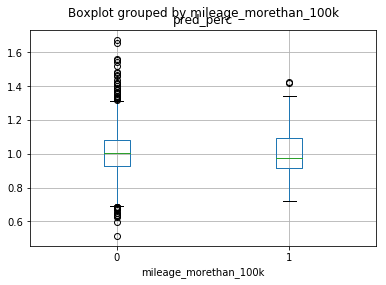

In [434]:
X_train_luxury.boxplot(column='pred_perc', by='mileage_morethan_100k')

In [439]:
over_estimated = X_train_luxury[X_train_luxury['pred_perc']>1.2]
over_estimated.to_csv('over_estimated.csv')

In [436]:
model7_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     176.4
Date:                Mon, 16 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:56:32   Log-Likelihood:                 1002.5
No. Observations:                1614   AIC:                            -1865.
Df Residuals:                    1544   BIC:                            -1488.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
images                        -0.0535      0.017     -3.060      0.002      -0.088      -0.019
age                           -0.0689      0.018     -3.756      0.000      -0.105      -0.033
city                           0.0096      0.001      8.645      0.000       0.007       0.012
highway                       -0.0149      0.002     -9.869      0.000      -0.018      -0.012
transmission                   0.0041      0.016      0.248      0.804      -0.028       0.036
drive                          0.1211      0.011     11.237      0.000       0.100       0.142
engine                         0.0159      0.011      1.417      0.157      -0.006       0.038
cylinder                       0.0124      0.009      1.401      0.161      -0.005       0.030
horsepower                     0.0001      0.000      0.370      0.711      -0.001       0.001
torque                         0.0011      0.000      5.363      0.000       0.001       0.001
rating_5                       0.0004      0.000      0.936      0.350      -0.000       0.001
rating_4                      -0.0002      0.001     -0.180      0.857      -0.003       0.002
rating_3                       0.0007      0.003      0.232      0.816      -0.005       0.007
rating_2                      -0.0093      0.005     -1.941      0.052      -0.019    9.91e-05
rating_1                       0.0046      0.005      0.948      0.343      -0.005       0.014
mileage                       -0.0037      0.000    -16.788      0.000      -0.004      -0.003
owner                          0.0060      0.006      1.088      0.277      -0.005       0.017
event                          0.0121      0.023      0.523      0.601      -0.033       0.058
recall                        -0.0010      0.009     -0.112      0.911      -0.018       0.016
store[T.Fremont, CA]           0.0439      0.017      2.521      0.012       0.010       0.078
store[T.Fresno, CA]            0.0630      0.019      3.332      0.001       0.026       0.100
store[T.Modesto, CA]           0.0205      0.017      1.197      0.232      -0.013       0.054
store[T.Pleasanton, CA]        0.0230      0.016      1.400      0.162      -0.009       0.055
store[T.Reno, NV]              0.0021      0.017      0.123      0.902      -0.031       0.036
store[T.Roseville, CA]        -0.0004      0.016     -0.027      0.979      -0.033       0.032
store[T.Sacramento, CA]        0.0481      0.018      2.744      0.006       0.014       0.083
store[T.San Francisco, CA]     0.0055      0.017      0.327      0.744      -0.027       0.038
store[T.San Jose, CA]          0.0048      0.017      0.277      0.782      -0.029       0.039
store[T.Santa Rosa, CA]        0.0107      0.017      0.645      0.519      -0.022       0.043
Intercept                      9.1292      

In [470]:
X_train_luxury.drop(['predicted', 'price', 'pred_perc'], axis=1, inplace=True)

** Model_8: Include interaction terms **

In [568]:
rcv = LassoCV(cv=5, alphas=[1e-12])
rcv.fit(X_train_luxury_norm, y_train_log)
zipped = zip(X_train_luxury.columns, np.abs(rcv.coef_))
features=sorted(zipped,key = lambda t: t[1],reverse=True)
df_feature = pd.DataFrame(features, columns=['variable', 'coefficient'])
df_feature[df_feature['coefficient']<0.05].sort_values('variable')

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coo

variable  coefficient
70                   Intercept     0.000000
60                       event     0.012597
56                      luxury     0.019910
51            make[T.Cadillac]     0.029554
49                 make[T.GMC]     0.033337
57               make[T.Honda]     0.017230
48             make[T.Lincoln]     0.039426
59                make[T.Mini]     0.014722
53              make[T.Subaru]     0.022311
50              make[T.Toyota]     0.031984
62       mileage_morethan_100k     0.008457
47                       owner     0.041092
54                    rating_3     0.021054
58                    rating_4     0.017044
66                      recall     0.002754
46        store[T.Fremont, CA]     0.043873
55        store[T.Modesto, CA]     0.020386
52     store[T.Pleasanton, CA]     0.022471
67           store[T.Reno, NV]     0.002686
69      store[T.Roseville, CA]     0.000609
45     store[T.Sacramento, CA]     0.046833
64  store[T.San Francisco, CA]     0.004832
63       store[T.San Jose, CA]     0.004883
61     store[T.Santa Rosa, CA]     0.009845
68                  torque_log     0.001240
65                transmission     0.003576

In [571]:
model7_pvalues = pd.DataFrame(list(zip(model7_sm.pvalues.index.tolist(), model7_sm.pvalues)), columns = ['variable', 'p-value'])                         

In [572]:
model7_pvalues[model7_pvalues['p-value'] > 0.1].sort_values('variable')

variable   p-value
68                     age_cub  0.538193
67                    age_quad  0.398904
7                     cylinder  0.161324
6                       engine  0.156567
17                       event  0.601220
8                   horsepower  0.711074
66                   image_cub  0.276028
33            make[T.Cadillac]  0.641633
39                 make[T.GMC]  0.469247
48             make[T.Lincoln]  0.439954
55             make[T.Pontiac]  0.384280
70       mileage_morethan_100k  0.661501
16                       owner  0.276790
14                    rating_1  0.343216
12                    rating_3  0.816387
11                    rating_4  0.856955
10                    rating_5  0.349601
18                      recall  0.910988
21        store[T.Modesto, CA]  0.231518
22     store[T.Pleasanton, CA]  0.161682
23           store[T.Reno, NV]  0.902171
24      store[T.Roseville, CA]  0.978703
26  store[T.San Francisco, CA]  0.743634
27       store[T.San Jose, CA]  0.781772
28     store[T.Santa Rosa, CA]  0.519254
63                  torque_log  0.955346
4                 transmission  0.804252

### Drop least significant variables

In [975]:
X_drop = deepcopy(X_train_budget)
y_drop = deepcopy(y_train_log)

In [964]:
reg = LinearRegression()
scores = cross_val_score(reg, X_drop, y_drop, cv=5, scoring='neg_mean_squared_error')
np.sqrt(-np.mean(scores))

3289.2424627809878

In [965]:
y_drop.shape, X_drop.columns.shape

((1614,), (102,))

In [966]:
model_drop = sm.OLS(y_drop, X_drop).fit()
model_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     121.9
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:26:20   Log-Likelihood:                -15199.
No. Observations:                1614   AIC:                         3.060e+04
Df Residuals:                    1515   BIC:                         3.113e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
transmission                 161.4195    385.258      0.419      0.675    -594.275     917.114
engine                       437.3945    273.294      1.600      0.110     -98.681     973.470
cylinder                     435.4473    210.543      2.068      0.039      22.460     848.434
rating_5                      15.0901     11.188      1.349      0.178      -6.855      37.035
rating_4                     -21.3972     29.426     -0.727      0.467     -79.117      36.323
rating_3                      47.8211     71.882      0.665      0.506     -93.177     188.820
rating_2                    -145.4000    112.245     -1.295      0.195    -365.573      74.773
rating_1                     188.0912    112.842      1.667      0.096     -33.251     409.434
owner                        229.5293    127.905      1.795      0.073     -21.359     480.418
event                        279.8596    540.572      0.518      0.605    -780.490    1340.209
recall                      -230.5682    207.789     -1.110      0.267    -638.152     177.016
store[T.Fremont, CA]         846.8572    404.738      2.092      0.037      52.950    1640.764
store[T.Fresno, CA]         1285.5644    438.602      2.931      0.003     425.233    2145.896
store[T.Modesto, CA]         308.6489    398.503      0.775      0.439    -473.026    1090.324
store[T.Pleasanton, CA]      641.3824    380.977      1.684      0.092    -105.915    1388.680
store[T.Reno, NV]             61.5918    396.915      0.155      0.877    -716.970     840.153
store[T.Roseville, CA]       131.0429    381.104      0.344      0.731    -616.504     878.590
store[T.Sacramento, CA]      648.1043    408.152      1.588      0.113    -152.499    1448.708
store[T.San Francisco, CA]   212.8614    387.025      0.550      0.582    -546.300     972.023
store[T.San Jose, CA]        298.3050    399.578      0.747      0.455    -485.479    1082.089
store[T.Santa Rosa, CA]      531.3983    386.429      1.375      0.169    -226.595    1289.392
Intercept                   6746.9464   5554.258      1.215      0.225   -4147.904    1.76e+04
make[T.Audi]                2432.5097    916.924      2.653      0.008     633.935    4231.084
make[T.BMW]                 1981.4076    738.251      2.684      0.007     533.306    3429.510
make[T.Buick]                400.6127    704.494      0.569      0.570    -981.274    1782.500
make[T.Cadillac]              -7.6633   1108.961     -0.007      0.994   -2182.924    2167.598
make[T.Chevrolet]            441.2653    447.709      0.986      0.324    -436.929    1319.460
make[T.Chrysler]           -2318.6430    677.625     -3.422      0.001   -3647.826    -989.460
make[T.Dodge]              -4983.4311    747.109     -6.670      0.000   -6448.908   -3517.954
make[T.Fiat]                 -17.3858    81

In [967]:
variables_dropped = []
model_score = []
for i in range(0,70):
    least_significant = model_drop.pvalues.argmax()
    # print (least_significant)
    if (model_drop.pvalues.max()>0.05):
        variables_dropped.append(least_significant)
        X_drop.drop((least_significant), axis=1, inplace=True)
        model_drop = sm.OLS(y_drop, X_drop).fit()
        model_score.append(model_drop.rsquared_adj)
pd.DataFrame(list(zip(variables_dropped, model_score)), columns=['dropped_variable','score'] )

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.


dropped_variable     score
0             make[T.Cadillac]  0.880265
1                 make[T.Fiat]  0.880265
2              make[T.Pontiac]  0.880265
3              make[T.Mercury]  0.880344
4                     torque^2  0.880422
5              city horsepower  0.880500
6            store[T.Reno, NV]  0.880577
7                 make[T.Jeep]  0.880653
8       store[T.Roseville, CA]  0.880724
9                 images drive  0.880794
10                    age city  0.880864
11                 images city  0.880932
12               make[T.Buick]  0.880998
13            drive horsepower  0.881063
14                transmission  0.881128
15                 age mileage  0.881188
16          make[T.Mitsubishi]  0.881247
17  store[T.San Francisco, CA]  0.881307
18              images mileage  0.881363
19                       event  0.881417
20        store[T.Modesto, CA]  0.881469
21       store[T.San Jose, CA]  0.881525
22                   age drive  0.881581
23                 city torque  0.881627
24              highway torque  0.881701
25                    rating_4  0.881747
26                    rating_3  0.881808
27                      budget  0.881858
28                         age  0.881907
29              age horsepower  0.881965
30           make[T.Chevrolet]  0.881998
31               make[T.Scion]  0.882019
32                     mileage  0.882029
33               make[T.Mazda]  0.882012
34                      recall  0.882035
35               make[T.Volvo]  0.882020
36                      city^2  0.882001
37                   Intercept  0.980952
38               images torque  0.980945
39     store[T.Santa Rosa, CA]  0.980936
40             make[T.Lincoln]  0.980926
41                 make[T.GMC]  0.980923
42                    rating_2  0.980912
43                    rating_1  0.980909
44                    rating_5  0.980888
45                       owner  0.980867
46     store[T.Sacramento, CA]  0.980847
47     store[T.Pleasanton, CA]  0.980828
48                      engine  0.980801
49        store[T.Fremont, CA]  0.980774
50               drive mileage  0.980744
51               make[T.Smart]  0.980714
52                  images age  0.980684
53                       age^2  0.980663

In [968]:
model_drop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1743.
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:26:39   Log-Likelihood:                -15225.
No. Observations:                1614   AIC:                         3.054e+04
Df Residuals:                    1567   BIC:                         3.080e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
cylinder                737.0832    132.668      5.556      0.000     476.859     997.308
store[T.Fresno, CA]     840.1850    329.377      2.551      0.011     194.119    1486.251
make[T.Audi]           2762.3483    713.029      3.874      0.000    1363.756    4160.941
make[T.BMW]            2467.8458    490.698      5.029      0.000    1505.352    3430.340
make[T.Chrysler]      -2657.9498    639.324     -4.157      0.000   -3911.971   -1403.929
make[T.Dodge]         -4062.0978    517.582     -7.848      0.000   -5077.325   -3046.871
make[T.Ford]          -1400.1687    286.076     -4.894      0.000   -1961.301    -839.036
make[T.Honda]          2045.7797    370.868      5.516      0.000    1318.330    2773.229
make[T.Hyundai]        -888.0031    360.724     -2.462      0.014   -1595.555    -180.451
make[T.Infiniti]      -1390.2196    614.281     -2.263      0.024   -2595.119    -185.321
make[T.Jaguar]         4268.1398    972.721      4.388      0.000    2360.169    6176.111
make[T.Kia]           -1174.6289    498.171     -2.358      0.019   -2151.781    -197.477
make[T.Land]           7750.7511    804.742      9.631      0.000    6172.267    9329.235
make[T.Lexus]          4369.0450    639.602      6.831      0.000    3114.479    5623.611
make[T.Mercedes-Benz]  2365.4385    564.329      4.192      0.000    1258.520    3472.357
make[T.Mini]           1530.0277    661.625      2.313      0.021     232.264    2827.791
make[T.Nissan]        -2186.8891    335.359     -6.521      0.000   -2844.688   -1529.090
make[T.Porsche]        1.792e+04   1133.444     15.809      0.000    1.57e+04    2.01e+04
make[T.Subaru]         2256.7822    663.292      3.402      0.001     955.749    3557.816
make[T.Toyota]         2014.2599    423.672      4.754      0.000    1183.237    2845.283
make[T.Volkswagen]    -2098.3025    388.332     -5.403      0.000   -2860.008   -1336.597
images                 -364.6329    119.078     -3.062      0.002    -598.202    -131.063
city                    627.8954     90.460      6.941      0.000     450.460     805.331
highway                -428.8881    107.800     -3.979      0.000    -640.336    -217.441
drive                 -6151.9355   1146.281     -5.367      0.000   -8400.341   -3903.530
horsepower               70.4976     13.308      5.297      0.000      44.394      96.601
torque                   41.8610      8.790      4.762      0.000      24.620      59.102
images^2                 35.8803      2.525     14.211      0.000      30.928      40.833
images highway           -6.1048      2.489     -2.452      0.014     -10.987      -1.222
images horsepower        -1.0707      0.202     -5.304      0.000      -1.467      -0.675
age highway             -15.7403      3.137     -5.018      0.000     -21.893      -9.588
age torque             

** Final columns **

In [976]:
final_columns = X_drop.columns.tolist()

In [977]:
X_test_luxury_red = X_test_luxury[final_columns]

In [978]:
X_test_luxury_red.shape

(1614, 102)

In [979]:
model_final = LinearRegression()
model_final.fit(X_drop, y_drop)
model_final.score(X_drop, y_drop)

0.90064836614466692

In [981]:
reg = LinearRegression()
scores = cross_val_score(reg, X_test_luxury_red, y_train, cv=5, scoring='neg_mean_squared_error')
np.sqrt(-np.mean(scores))

3289.2424627809878

In [974]:
model_final.score(X_test_luxury_red, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [539, 1614]

In [744]:
# Create your model
model_log = sm.OLS(y_drop, X_drop)

# Fit your model to your training set
fit_log = model_log.fit()

# Print summary statistics of the model's performance
fit_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     297.8
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:50:33   Log-Likelihood:                 991.69
No. Observations:                1614   AIC:                            -1899.
Df Residuals:                    1572   BIC:                            -1673.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
images                     -0.0342      0.003    -13.084      0.000      -0.039      -0.029
age                        -0.0469      0.002    -20.402      0.000      -0.051      -0.042
city                        0.0095      0.001      9.044      0.000       0.007       0.012
highway                    -0.0148      0.001    -10.445      0.000      -0.018      -0.012
drive                       0.1208      0.011     11.394      0.000       0.100       0.142
cylinder                    0.0231      0.005      4.658      0.000       0.013       0.033
torque                      0.0011      8e-05     14.019      0.000       0.001       0.001
mileage                    -0.0038      0.000    -20.185      0.000      -0.004      -0.003
store[T.Fremont, CA]        0.0330      0.012      2.720      0.007       0.009       0.057
store[T.Fresno, CA]         0.0510      0.014      3.560      0.000       0.023       0.079
store[T.Sacramento, CA]     0.0382      0.013      3.058      0.002       0.014       0.063
Intercept                   8.4164      0.113     74.784      0.000       8.196       8.637
make[T.Audi]                0.1087      0.030      3.665      0.000       0.051       0.167
make[T.BMW]                 0.0970      0.021      4.647      0.000       0.056       0.138
make[T.Buick]               0.4181      0.028     14.785      0.000       0.363       0.474
make[T.Chevrolet]           0.4355      0.015     28.706      0.000       0.406       0.465
make[T.Chrysler]            0.2618      0.027      9.652      0.000       0.209       0.315
make[T.Dodge]              -0.1544      0.022     -6.983      0.000      -0.198      -0.111
make[T.Fiat]                0.3778      0.032     11.637      0.000       0.314       0.441
make[T.Ford]                0.3604      0.013     27.987      0.000       0.335       0.386
make[T.Honda]               0.5619      0.016     35.608      0.000       0.531       0.593
make[T.Hyundai]             0.3759      0.015     24.530      0.000       0.346       0.406
make[T.Infiniti]           -0.0633      0.026     -2.397      0.017      -0.115      -0.011
make[T.Jaguar]              0.1575      0.042      3.766      0.000       0.075       0.239
make[T.Jeep]                0.4284      0.019     22.913      0.000       0.392       0.465
make[T.Kia]                 0.3682      0.021     17.567      0.000       0.327       0.409
make[T.Land]                0.2399      0.034      7.037      0.000       0.173       0.307
make[T.Lexus]               0.1900      0.027      7.078      0.000       0.137       0.243
make[T.Mazda]               0.4778      0.021     23.163      0.000       0.437       0.518
make[T.Mercedes-Benz]       0.1005      0.024      4.244      0.000       0.054       0.147
make[T.Mini]                0.5271      0.027  

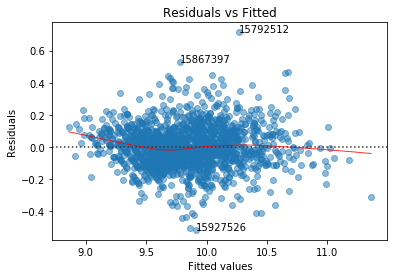

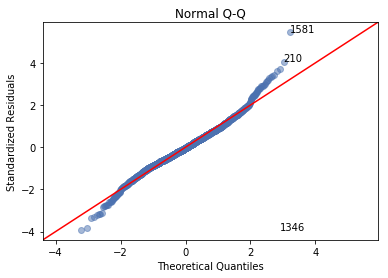

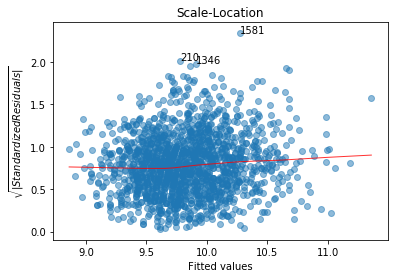

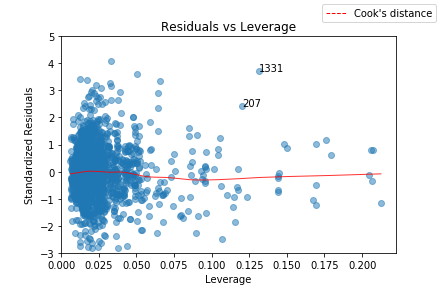

In [745]:
diagnostic_plots.diagnostic_plots(X_drop, y_drop, model_drop)

In [533]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [1e-12, 0.01, 0]}
grid = GridSearchCV(Lasso(), param_grid)
grid.fit(X_train_luxury_norm, y_train_log)
grid.grid_scores_

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/sklearn/model_selection/

[mean: 0.87046, std: 0.00366, params: {'alpha': 1e-12},
 mean: 0.71942, std: 0.01499, params: {'alpha': 0.01},
 mean: 0.87046, std: 0.00366, params: {'alpha': 0}]

In [503]:
X_train_luxury.head()

images  age       city    highway  transmission  drive  engine  \
stock_id                                                                   
16057160      20    5  24.000000  34.000000             0      0     1.8   
16057266      20    4  26.000000  34.000000             0      0     1.4   
15867037      21    2  25.000000  32.000000             0      0     2.0   
16211748       0    2  17.000000  24.000000             0      0     3.0   
16062084      20    5  23.676431  31.466045             0      0     2.4   

          cylinder  horsepower  torque          ...            \
stock_id                                        ...             
16057160       4.0       170.0   184.0          ...             
16057266       4.0       138.0   148.0          ...             
15867037       4.0       189.0   207.0          ...             
16211748       6.0       425.0   406.0          ...             
16062084       4.0       173.0   166.0          ...             

          make[T.Volkswagen]  make[T.Volvo]  torque_log  horsepower_log  \
stock_id                                                                  
16057160                 1.0            0.0    5.214936        5.135798   
16057266                 0.0            0.0    4.997212        4.927254   
15867037                 0.0            0.0    5.332719        5.241747   
16211748                 0.0            0.0    6.006353        6.052089   
16062084                 0.0            0.0    5.111988        5.153292   

          image_quad  image_cub  age_quad  age_cub  luxury  \
stock_id                                                     
16057160         400       8000        25      125     0.0   
16057266         400       8000        16       64     0.0   
15867037         441       9261         4        8     0.0   
16211748           0          0         4        8     1.0   
16062084         400       8000        25      125     1.0   

          mileage_morethan_100k  
stock_id                         
16057160                      0  
16057266                      0  
15867037                      0  
16211748                      0  
16062084                      0  

[5 rows x 71 columns]

In [493]:
y_train_log.head()

stock_id
16057160     9.392495
16057266     9.615672
15867037    10.025661
16211748    11.002067
16062084     9.441373
Name: price, dtype: float64

###

Criteria to remove predictors? <br>
- look at high p-values -> backward selection
- Lasso/Ridge
- Categorize the categorical data

How to deal with outliers? Especially <br>
- Analyze the outliers and introduce more features to describe them
- For high leverage points, introduce transformation to make the data less leveraged

How to compare two models with different y? <br>
- If y is transformed, all scores including r squared are not on the same scale
- use exp to return y to original scale

How to include higher polynomial terms efficiently? <>
- Use PolynomialFeatures?


## Learning curve

In [703]:
from sklearn.model_selection import learning_curve
# Make a model, say quadratic

learning_curve(model_final, X_drop, y_drop, cv=5)

(array([ 129,  419,  710, 1000, 1291]),
 array([[ 0.94111801,  0.90440123,  0.90440123,  0.90440123,  0.90440123],
        [ 0.88652566,  0.88904169,  0.89825607,  0.89825607,  0.89825607],
        [ 0.889901  ,  0.89035445,  0.89281958,  0.88738111,  0.88738111],
        [ 0.88906502,  0.88895471,  0.89177019,  0.88672663,  0.88697672],
        [ 0.88629553,  0.88624251,  0.88810853,  0.88453897,  0.88685629]]),
 array([[ 0.80917513,  0.7869755 ,  0.80869889,  0.83116837,  0.79390459],
        [ 0.87282173,  0.85500473,  0.86564717,  0.87537552,  0.87107737],
        [ 0.87754074,  0.87364187,  0.86668604,  0.88354101,  0.87605355],
        [ 0.87924683,  0.87856712,  0.86602868,  0.885085  ,  0.87700136],
        [ 0.8794653 ,  0.87890865,  0.86854657,  0.88565712,  0.87810537]]))

In [704]:
train_sizes, train_scores, test_scores = learning_curve(model_final, X_drop, y_drop, cv=5)

In [705]:
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df  = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})


(-1, 1)

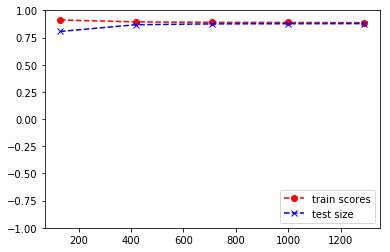

In [706]:
plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test size')
plt.legend(loc='lower right')
plt.ylim(-1,1)

In [707]:
train_scores

array([[ 0.94111801,  0.90440123,  0.90440123,  0.90440123,  0.90440123],
       [ 0.88652566,  0.88904169,  0.89825607,  0.89825607,  0.89825607],
       [ 0.889901  ,  0.89035445,  0.89281958,  0.88738111,  0.88738111],
       [ 0.88906502,  0.88895471,  0.89177019,  0.88672663,  0.88697672],
       [ 0.88629553,  0.88624251,  0.88810853,  0.88453897,  0.88685629]])